# 2U Analysis 


In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline 

import statsmodels.api as sm
from pylab import mpl, plt
import scipy.stats as scs
import scipy.optimize as sco
import time
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
from pathlib import Path
import seaborn as sns

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [4]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [45]:
timeframe = "1D"

start_date = pd.Timestamp("2016-09-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-19", tz="America/New_York").isoformat()

ticker = ['NFLX']

Twou_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date

).df
Twou_df.tail()

NFLX                                     
                              open      high       low   close   volume
2021-02-12 00:00:00-05:00  556.940  561.2499  550.8500  556.57  1927164
2021-02-16 00:00:00-05:00  557.286  563.6300  552.7300  557.29  2168296
2021-02-17 00:00:00-05:00  550.990  555.2500  543.0300  551.34  1898998
2021-02-18 00:00:00-05:00  549.000  550.0000  538.2265  548.18  2200654
2021-02-19 00:00:00-05:00  548.000  548.9900  538.8132  540.47  2534092

In [6]:
MC_Three_Year = MCSimulation(
    portfolio_data = Twou_df,
    num_simulation = 500,
    num_trading_days = 252*3
)


MC_Three_Year.portfolio_data.head()

TWOU                                           
                            open   high     low  close  volume daily_return
2020-09-28 00:00:00-04:00  35.66  36.38  34.780  35.70  941430          NaN
2020-09-29 00:00:00-04:00  35.68  36.09  34.900  35.15  577586    -0.015406
2020-09-30 00:00:00-04:00  35.08  35.47  33.525  33.85  779276    -0.036984
2020-10-01 00:00:00-04:00  34.20  34.92  33.170  34.85  886772     0.029542
2020-10-02 00:00:00-04:00  33.65  35.00  33.330  34.25  639561    -0.017217

In [7]:
MC_Three_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.085316,0.992983,1.025200,1.009297,0.999916,1.090650,0.945245,1.044076,1.038082,0.952506,...,1.018380,0.979463,1.011107,1.016077,0.997485,1.051021,0.981789,1.027795,1.069307,0.972206
2,1.103049,1.086871,1.040578,0.943864,0.978994,1.125416,0.939237,1.000256,1.051680,0.971870,...,1.139640,0.886290,1.025687,0.981714,1.013266,1.040729,0.995065,0.961515,1.105720,0.982414
3,1.148951,1.145563,0.985817,0.949322,0.972633,1.107621,0.979051,1.023072,1.017322,1.053466,...,1.142916,0.866321,0.992412,0.985423,1.035734,1.076919,1.020931,0.928740,1.123848,0.949996
4,1.168972,1.226839,0.973845,0.958232,0.924794,1.110726,0.965707,1.078791,1.125284,1.013680,...,1.205269,0.912918,1.004026,0.980548,1.089558,1.006200,1.034917,0.943640,1.119170,0.948897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,94.181906,13.880348,13.050738,11.927559,54.367681,30.888131,39.609076,78.420681,19.657921,271.840668,...,109.752502,7.022662,4.316759,14.629400,35.398239,7.974669,22.190869,26.495943,10.744150,28.336057
753,92.434438,14.550604,13.479377,11.599383,54.608123,29.402669,38.106452,77.009172,20.343673,272.290209,...,112.156523,7.236145,4.339951,13.938398,35.086254,7.546009,21.356932,25.840151,9.841003,29.491931
754,99.440937,15.878248,13.429334,11.932806,57.696672,28.968953,37.501032,81.823956,19.763155,265.372010,...,112.692549,6.873207,4.457286,14.016749,37.063208,7.260508,21.884512,27.638219,10.157349,28.396533
755,97.775848,16.292760,13.588362,11.654389,60.613692,30.477620,36.746381,81.375449,20.923332,280.804880,...,101.381567,6.455631,4.533951,14.622706,38.873579,7.388912,21.707638,27.959678,10.155899,29.302476


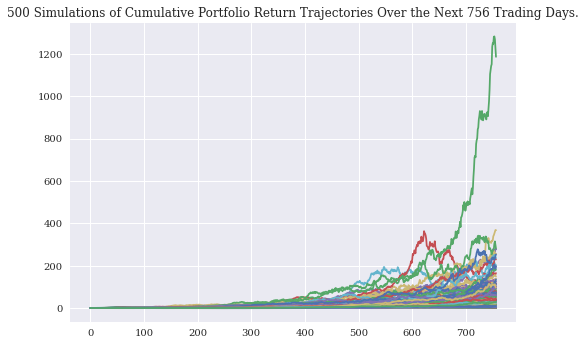

In [8]:
line_plot = MC_Three_Year.plot_simulation()

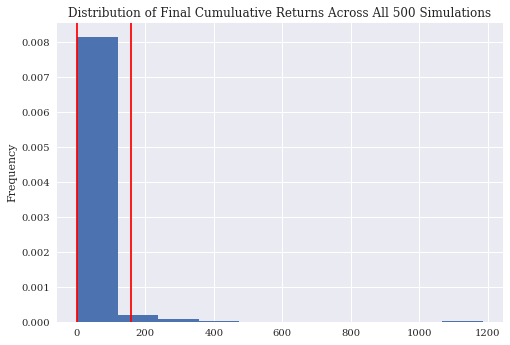

In [9]:
dist_plot = MC_Three_Year.plot_distribution()

In [10]:
csvpath = Path ( "TWOU.csv")

In [17]:
TWOU_df = pd.read_csv(csvpath,parse_dates=True, infer_datetime_format=True)
TWOU_df = TWOU_df.dropna()
TWOU_df = TWOU_df.set_index('Date')
TWOU_df.columns = pd.MultiIndex.from_product([['TWOU'],TWOU_df.columns])
TWOU_df.head()

TWOU                                        
             Open    High    Low  Close Adj Close  Volume
Date                                                     
2014-04-01  13.65  14.150  13.65  14.06     14.06  467300
2014-04-02  14.10  15.610  13.93  15.61     15.61  592100
2014-04-03  15.85  15.890  13.27  14.15     14.15  485200
2014-04-04  13.89  14.190  13.00  13.06     13.06  415300
2014-04-07  13.05  13.388  12.83  12.99     12.99  213600

In [20]:
_returns = TWOU_df.pct_change().dropna()
daily_returns

TWOU                                                  
                Open      High       Low     Close Adj Close    Volume
Date                                                                  
2014-04-02  0.032967  0.103180  0.020513  0.110242  0.110242  0.267066
2014-04-03  0.124113  0.017937 -0.047380 -0.093530 -0.093530 -0.180544
2014-04-04 -0.123659 -0.106986 -0.020347 -0.077032 -0.077032 -0.144064
2014-04-07 -0.060475 -0.056519 -0.013077 -0.005360 -0.005360 -0.485673
2014-04-08  0.014559 -0.008067  0.002338  0.001540  0.001540 -0.442884
...              ...       ...       ...       ...       ...       ...
2021-02-11  0.016045 -0.002587  0.003773  0.020972  0.020972 -0.311774
2021-02-12  0.081624  0.126696  0.088745  0.129754  0.129754  1.165889
2021-02-16  0.069776  0.057907  0.042961 -0.020162 -0.020162 -0.063188
2021-02-17 -0.053261 -0.072816 -0.058477 -0.026823 -0.026823 -0.345427
2021-02-18 -0.040906 -0.060119 -0.024453 -0.043232 -0.043232 -0.301662

[1733 rows x 6 columns]

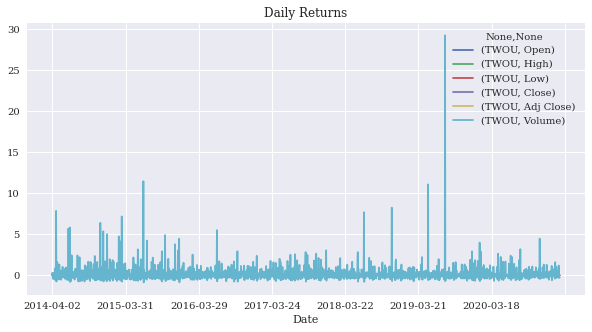

In [23]:
daily_returns.plot(figsize=(10,5), title = "Daily Returns")

In [29]:
cum_return = (1+ daily_returns).cumprod()
cum_return

TWOU                                                  
                Open      High       Low     Close Adj Close    Volume
Date                                                                  
2014-04-02  1.032967  1.103180  1.020513  1.110242  1.110242  1.267066
2014-04-03  1.161172  1.122968  0.972161  1.006401  1.006401  1.038305
2014-04-04  1.017582  1.002827  0.952381  0.928876  0.928876  0.888722
2014-04-07  0.956044  0.946148  0.939927  0.923898  0.923898  0.457094
2014-04-08  0.969963  0.938516  0.942125  0.925320  0.925320  0.254654
...              ...       ...       ...       ...       ...       ...
2021-02-11  3.572161  3.542049  3.508425  3.497155  3.497155  2.889578
2021-02-12  3.863736  3.990813  3.819780  3.950925  3.950925  6.258506
2021-02-16  4.133333  4.221908  3.983883  3.871266  3.871266  5.863043
2021-02-17  3.913187  3.914488  3.750916  3.767425  3.767425  3.837792
2021-02-18  3.753114  3.679152  3.659194  3.604552  3.604552  2.680077

[1733 rows x 6 columns]

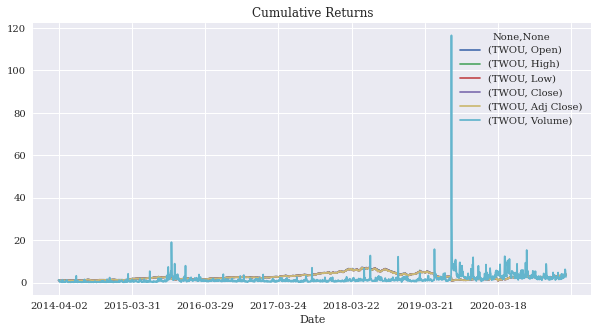

In [30]:
cum_return.plot(figsize=(10,5), title = "Cumulative Returns")

In [31]:
TwoU_std = daily_returns.std()
TwoU_std

TWOU  Open         0.037688
      High         0.033985
      Low          0.036540
      Close        0.037102
      Adj Close    0.037102
      Volume       1.147430
dtype: float64

In [32]:
TwoU_annual_std = daily_returns.std() * np.sqrt(252)
TwoU_annual_std

TWOU  Open          0.598280
      High          0.539499
      Low           0.580056
      Close         0.588974
      Adj Close     0.588974
      Volume       18.214880
dtype: float64

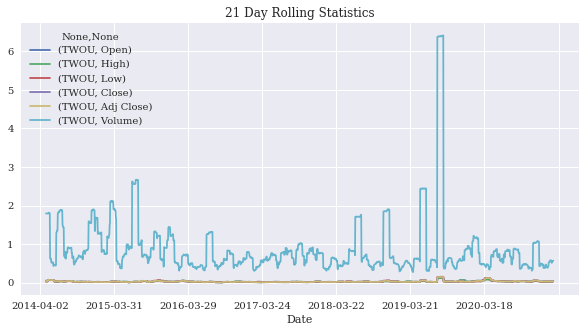

In [33]:
daily_returns.rolling(21).std().plot(figsize=(10,5), title= "21 Day Rolling Statistics")

In [34]:
Twou_sharpe_ratio = (daily_returns.mean() * 252) / TwoU_annual_std
Twou_sharpe_ratio


TWOU  Open         0.638410
      High         0.638898
      Low          0.673710
      Close        0.660451
      Adj Close    0.660451
      Volume       2.762421
dtype: float64

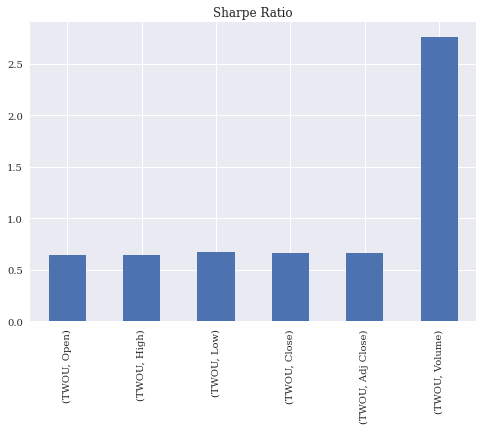

In [35]:
Twou_sharpe_ratio.plot.bar(title = "Sharpe Ratio")

In [36]:
MC_Three_Year = MCSimulation(
    portfolio_data = TWOU_df,
    num_simulation = 500,
    num_trading_days = 252*3
)

# Print the simulation input data
MC_Three_Year.portfolio_data.head()

KeyError: 'close'